In [1]:
import os
import pandas as pd 
import librosa
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torchaudio
from IPython.display import Audio

import nibabel as nib
from nilearn import plotting
from nilearn.glm.first_level import FirstLevelModel
from nilearn.plotting import plot_design_matrix
from nilearn.plotting import plot_contrast_matrix

## Save MP4 Spectrograms for Site

In [ ]:
path_to_save = "/home/matteoc/genre-to-fmri/music_spectr/4"
print(os.listdir(path_to_save))
for audio in (os.listdir(path_to_save)):
    signal, sr = librosa.load(path_to_save + "/" + audio)
    X_oth = librosa.stft(signal)
    Xdb_oth = librosa.amplitude_to_db(abs(X_oth), ref=np.max)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(Xdb_oth, sr=sr, x_axis='time', y_axis='hz',)
    plt.colorbar()
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    filename = os.path.splitext(audio)[0]  # Remove file extension
    plt.savefig(os.path.join(path_to_save, f'{filename}.png'))
    plt.show()
    
    

# Exploring Wav

In [2]:
fmri_music_path = '/data01/data/fMRI_music_genre'
print(os.listdir(fmri_music_path))
stimuli_path = fmri_music_path + '/data_wav'
print(os.listdir(stimuli_path))

['data_wav', 'ds003720', 'glmsingle_outputs', 'ds003720-download', 'annex-uuid', 'fmri_preproc_data']
['brain2music-captions.csv', 'genres_original', '.DS_Store', 'features_30_sec.csv', 'images_original', 'features_3_sec.csv']


In [3]:
csv_captions_path = stimuli_path + '/brain2music-captions.csv'
df = pd.read_csv(csv_captions_path)
print(df.head())

                ID                                             DescEN
0  blues.00000_15s  Heavy blues with male vocals. Simple cutting w...
1  blues.00002_15s  Rhythmic blues. Obligatory trumpet obbligato a...
2  blues.00005_15s  Slow blues musical piece. Sentimental atmosphe...
3  blues.00006_15s  This blues is played with twin guitars only. T...
4  blues.00010_15s  This is an instrumental piece with electric gu...


In [4]:
csv_feature_path = stimuli_path + '/features_30_sec.csv'
df = pd.read_csv(csv_feature_path)
column_names = df.columns
print(column_names.tolist())

['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'label']


In [5]:
wav_path = stimuli_path + '/genres_original'
print(os.listdir(wav_path))
metal_path = wav_path + '/metal'
print(os.listdir(metal_path))


['pop', '.DS_Store', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']
['metal.00022.wav', 'metal.00036.wav', 'metal.00037.wav', 'metal.00023.wav', 'metal.00009.wav', 'metal.00035.wav', 'metal.00021.wav', 'metal.00020.wav', 'metal.00034.wav', 'metal.00008.wav', 'metal.00030.wav', 'metal.00024.wav', 'metal.00018.wav', 'metal.00019.wav', 'metal.00025.wav', 'metal.00031.wav', 'metal.00027.wav', 'metal.00033.wav', 'metal.00032.wav', 'metal.00026.wav', 'metal.00082.wav', 'metal.00096.wav', 'metal.00069.wav', 'metal.00041.wav', 'metal.00055.wav', 'metal.00054.wav', 'metal.00040.wav', 'metal.00068.wav', 'metal.00097.wav', 'metal.00083.wav', 'metal.00095.wav', 'metal.00081.wav', 'metal.00056.wav', 'metal.00042.wav', 'metal.00043.wav', 'metal.00057.wav', 'metal.00080.wav', 'metal.00094.wav', 'metal.00090.wav', 'metal.00084.wav', 'metal.00053.wav', 'metal.00047.wav', 'metal.00046.wav', 'metal.00052.wav', 'metal.00085.wav', 'metal.00091.wav', 'metal.00087.wav'

In [6]:
audio_metal = metal_path + '/metal.00022.wav'
print(audio_metal)
Audio(audio_metal)



/data01/data/fMRI_music_genre/data_wav/genres_original/metal/metal.00022.wav


In [7]:
audio_oth = wav_path + '/classical' + '/classical.00011.wav'
Audio(audio_oth)

Sampling Rate:  16000


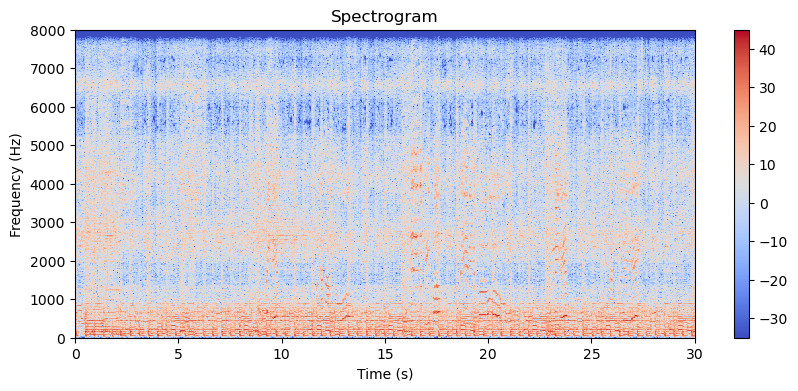

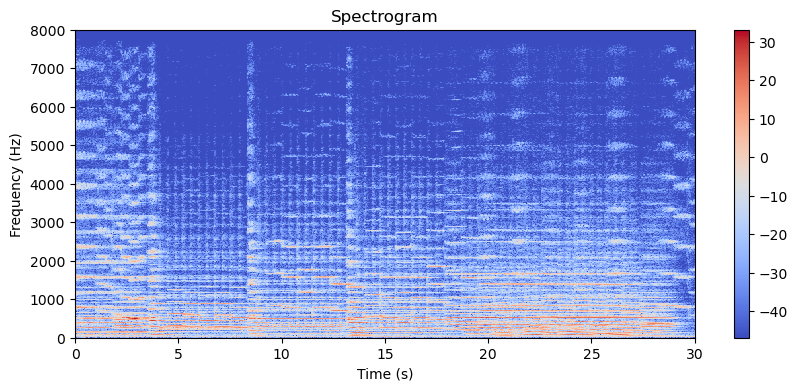

In [8]:
signal_metal, sr = librosa.load(audio_metal, sr=16000)
signal_other, sr = librosa.load(audio_oth, sr=16000)
print("Sampling Rate: ", sr)

X_met = librosa.stft(signal_metal)
Xdb_met = librosa.amplitude_to_db(abs(X_met))
X_oth = librosa.stft(signal_other)
Xdb_oth = librosa.amplitude_to_db(abs(X_oth))

plt.figure(figsize=(10, 4))
librosa.display.specshow(Xdb_met, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.specshow(Xdb_oth, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

In [9]:
sr

16000

In [10]:
signal_metal.shape

(480003,)

## Preproc from AudioLDM2

In [11]:
import torchaudio

def pad_wav(waveform, segment_length):
    waveform_length = waveform.shape[-1]
    assert waveform_length > 100, "Waveform is too short, %s" % waveform_length
    if segment_length is None or waveform_length == segment_length:
        return waveform
    elif waveform_length > segment_length:
        return waveform[:segment_length]
    elif waveform_length < segment_length:
        temp_wav = np.zeros((1, segment_length))
        temp_wav[:, :waveform_length] = waveform
    return temp_wav

def normalize_wav(waveform):
    waveform = waveform - np.mean(waveform)
    waveform = waveform / (np.max(np.abs(waveform)) + 1e-8)
    return waveform * 0.5


def read_wav_file(filename, segment_length):
    # waveform, sr = librosa.load(filename, sr=None, mono=True) # 4 times slower
    waveform, sr = torchaudio.load(filename)  # Faster!!!
    waveform = torchaudio.functional.resample(waveform, orig_freq=sr, new_freq=16000)
    waveform = waveform.numpy()[0, ...]
    waveform = normalize_wav(waveform)
    waveform = waveform[None, ...]
    waveform = pad_wav(waveform, segment_length)

    waveform = waveform / np.max(np.abs(waveform))
    waveform = 0.5 * waveform

    return waveform


preproc = read_wav_file(audio_metal, 480003)
print(preproc.shape)
print(preproc.mean())

(1, 480003)
7.0531725e-10


torch.Size([1, 64, 3001])


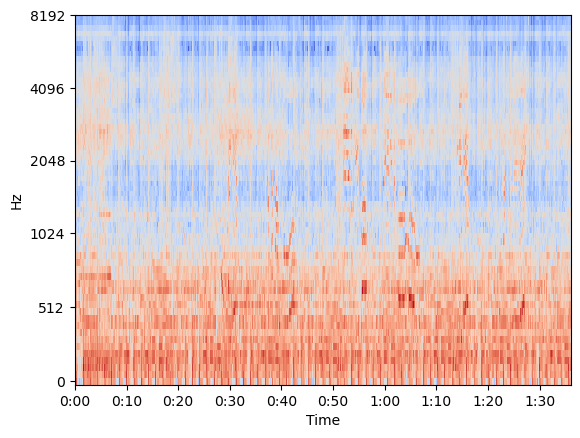

In [12]:
# mel_spect = librosa.feature.melspectrogram(y=preproc[0], sr=16000, n_mels=128)
mel_spect = librosa.feature.melspectrogram(y=preproc[0], sr=16000, n_mels=64, n_fft=1024, hop_length=160,
                                           win_length=1024, fmin=0, fmax=8000)
log_mel_spectrogram = librosa.power_to_db(mel_spect)
log_mel_spectrogram_3D = torch.from_numpy(log_mel_spectrogram)
log_mel_spectrogram_3D = log_mel_spectrogram_3D.unsqueeze(0)
print(log_mel_spectrogram_3D.shape)
librosa.display.specshow(log_mel_spectrogram, x_axis="time", y_axis="mel", sr=16000)




In [13]:
log_mel_spectrogram_unsq = log_mel_spectrogram_3D.unsqueeze(0).float()
# batch_size, channel, mel_bins, time_steps
print(log_mel_spectrogram_unsq.shape)

torch.Size([1, 1, 64, 3001])


In [14]:
log_mel_spectrogram_unsq.mean()

tensor(-12.6990)

## Getting into AudioLDM

In [15]:
from diffusers import AudioLDM2Pipeline

/home/matteoc/miniconda3/envs/speech-meg/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
repo_id = "cvssp/audioldm2-music"
# pipe = AudioLDM2Pipeline.from_pretrained(repo_id, torch_dtype=torch.float16)
pipe = AudioLDM2Pipeline.from_pretrained(repo_id)

Loading pipeline components...: 100%|██████████| 11/11 [00:01<00:00,  6.09it/s]


In [17]:
# pipe = pipe.to("cuda")
vae = pipe.vae
unet = pipe.unet
encoder = vae.encoder
decoder = vae.decoder
vocoder = pipe.vocoder
mel_spect_to_wav = pipe.mel_spectrogram_to_waveform

In [18]:
prova_out = vae(log_mel_spectrogram_unsq)
# prova_out = encoder(log_mel_spectrogram_unsq)

In [19]:
prova_out.sample.shape

torch.Size([1, 1, 64, 3000])

In [20]:
vocoder_upsample_factor = np.prod(vocoder.config.upsample_rates) / vocoder.config.sampling_rate
print(vocoder_upsample_factor)
height = int(30.0 / vocoder_upsample_factor)
print(height)
vae_scale_factor = 2 ** (len(vae.config.block_out_channels) - 1)
print(vae_scale_factor)
audio_length_in_s = unet.config.sample_size * vae_scale_factor * vocoder_upsample_factor
print(audio_length_in_s)
original_waveform_length = int(30.0 * vocoder.config.sampling_rate)
print(original_waveform_length)
if height % vae_scale_factor != 0:
    height = int(np.ceil(height / vae_scale_factor)) * vae_scale_factor
    print(
        f"Audio length in seconds {30.0} is increased to {height * vocoder_upsample_factor} "
        f"so that it can be handled by the model. It will be cut to {30.0} after the "
        f"denoising process."
    )

# latents = 1 / vae.config.scaling_factor * prova_out
# mel_spectrogram = vae.decode(latents).sample

0.01
3000
4
10.24
480000


In [21]:
to_reconstruct = prova_out.sample[0][0].detach().numpy()

In [22]:
to_reconstruct.mean()

-6.758623

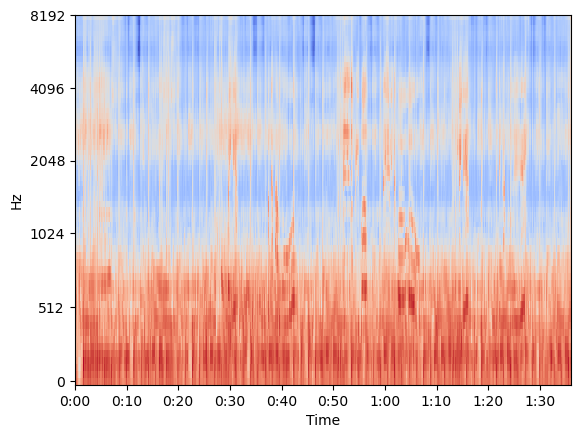

In [23]:
librosa.display.specshow(to_reconstruct, x_axis="time", y_axis="mel", sr=sr)

In [31]:
audio = pipe.mel_spectrogram_to_waveform(prova_out.sample.permute(0,1,3,2))

In [32]:
audio.shape

torch.Size([1, 480032])

In [33]:
audio = audio[:, :480003]

In [28]:
inv_mel = librosa.feature.inverse.mel_to_audio(to_reconstruct, sr=16000, n_fft=1024, hop_length=160, 
                                               win_length=1024, fmin=0, fmax=8000)
inv_mel_power = librosa.db_to_power(inv_mel)

In [29]:
inv_mel.shape

(479840,)

In [29]:
reale = librosa.feature.inverse.mel_to_audio(mel_spect, sr=sr)

In [37]:
Audio(audio.detach().numpy(), rate=16000)
# Audio(inv_mel, rate=16000)

# Exploring fMRI

In [9]:
neural_path = fmri_music_path + '/ds003720/sub-001'
print(os.listdir(neural_path))
event_path_test = neural_path + '/func/sub-001_task-Test_run-02_events.tsv'
event_path_train = neural_path + '/func/sub-001_task-Training_run-02_events.tsv'

['anat', 'func']


In [10]:
pd.read_csv(event_path_test, sep='\t')

onset  duration        genre  track  start    end
0       0        15      'metal'     63   4.97  19.97
1      15        15     'reggae'      1  11.37  26.37
2      30        15       'rock'     74   1.95  16.95
3      45        15     'hiphop'     19   7.91  22.91
4      60        15        'pop'     96   7.39  22.39
5      75        15    'country'     12  11.43  26.43
6      90        15       'jazz'     40  14.30  29.30
7     105        15      'blues'     40  10.62  25.62
8     120        15  'classical'     71   6.38  21.38
9     135        15      'disco'     71   0.81  15.81
10    150        15      'metal'     63   4.97  19.97
11    165        15     'reggae'      1  11.37  26.37
12    180        15       'rock'     74   1.95  16.95
13    195        15     'hiphop'     19   7.91  22.91
14    210        15        'pop'     96   7.39  22.39
15    225        15    'country'     12  11.43  26.43
16    240        15       'jazz'     40  14.30  29.30
17    255        15      'blues'     40  10.62  25.62
18    270        15  'classical'     71   6.38  21.38
19    285        15      'disco'     71   0.81  15.81
20    300        15      'metal'     63   4.97  19.97
21    315        15     'reggae'      1  11.37  26.37
22    330        15       'rock'     74   1.95  16.95
23    345        15     'hiphop'     19   7.91  22.91
24    360        15        'pop'     96   7.39  22.39
25    375        15    'country'     12  11.43  26.43
26    390        15       'jazz'     40  14.30  29.30
27    405        15      'blues'     40  10.62  25.62
28    420        15  'classical'     71   6.38  21.38
29    435        15      'disco'     71   0.81  15.81
30    450        15      'metal'     63   4.97  19.97
31    465        15     'reggae'      1  11.37  26.37
32    480        15       'rock'     74   1.95  16.95
33    495        15     'hiphop'     19   7.91  22.91
34    510        15        'pop'     96   7.39  22.39
35    525        15    'country'     12  11.43  26.43
36    540        15       'jazz'     40  14.30  29.30
37    555        15      'blues'     40  10.62  25.62
38    570        15  'classical'     71   6.38  21.38
39    585        15      'disco'     71   0.81  15.81
40    600        15      'metal'     63   4.97  19.97

In [11]:
pd.read_csv(event_path_train, sep='\t')

onset  duration        genre  track  start    end
0       0        15      'metal'     78   1.74  16.74
1      15        15       'rock'     65   0.53  15.53
2      30        15      'metal'     10   8.30  23.30
3      45        15      'disco'     53  10.14  25.14
4      60        15       'jazz'     55  12.04  27.04
5      75        15    'country'     81  13.70  28.70
6      90        15     'reggae'     62  14.38  29.38
7     105        15     'hiphop'     56   6.68  21.68
8     120        15        'pop'     52   5.41  20.41
9     135        15  'classical'     33   0.71  15.71
10    150        15      'blues'     74  13.08  28.08
11    165        15       'rock'     53   0.35  15.35
12    180        15     'hiphop'     62   1.77  16.77
13    195        15      'disco'     61   7.53  22.53
14    210        15       'jazz'     78   5.84  20.84
15    225        15      'metal'      4   2.34  17.34
16    240        15        'pop'     99   6.16  21.16
17    255        15     'reggae'     79  13.25  28.25
18    270        15      'blues'     45   7.67  22.67
19    285        15    'country'      6   6.31  21.31
20    300        15  'classical'     28  12.68  27.68
21    315        15       'rock'      9   1.34  16.34
22    330        15     'hiphop'     35   2.20  17.20
23    345        15      'metal'      8   6.54  21.54
24    360        15    'country'     46  11.20  26.20
25    375        15        'pop'     26   9.71  24.71
26    390        15     'reggae'     84  14.48  29.48
27    405        15       'jazz'     79   0.90  15.90
28    420        15  'classical'     26   1.09  16.09
29    435        15      'disco'     54   5.34  20.34
30    450        15      'blues'     94   2.93  17.93
31    465        15       'jazz'     67   3.64  18.64
32    480        15     'reggae'     77   7.17  22.17
33    495        15      'blues'     64   6.84  21.84
34    510        15      'disco'     16   4.62  19.62
35    525        15     'hiphop'     60  13.80  28.80
36    540        15       'rock'     76   1.14  16.14
37    555        15      'metal'      9   8.84  23.84
38    570        15    'country'     72   2.98  17.98
39    585        15  'classical'     94   3.82  18.82
40    600        15        'pop'     37  14.42  29.42

In [12]:
fmri_data = nib.load(event_path_train.replace('events.tsv', 'bold.nii'))

In [13]:
print(fmri_data)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (96, 96, 68, 410)
affine:
[[-1.99697757e+00  9.76685435e-02  5.04113697e-02  9.09995117e+01]
 [ 9.47604254e-02  1.99468148e+00 -1.10752434e-01 -7.82326355e+01]
 [ 5.56858294e-02  1.08196564e-01  1.99629462e+00 -4.51147003e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 57
dim             : [  4  96  96  68 410   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.   2.   2.   2.   1.5  0.   0.   0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 

In [14]:
fmri_data.get_fdata().shape

(96, 96, 68, 410)

## 10 Genres

### FLM & Design Matrix

In [15]:
events_df = pd.read_csv(event_path_train, sep='\t')
fmri_img = nib.load(event_path_train.replace('events.tsv', 'bold.nii'))
t_r = 1.5

events_df['trial_type'] = events_df['genre']
first_level_model = FirstLevelModel(t_r)
first_level_model = first_level_model.fit(fmri_img, events=events_df)
design_matrix = first_level_model.design_matrices_[0]



/home/matteoc/miniconda3/envs/speech-meg/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: end, genre, track, start
  warnings.warn(


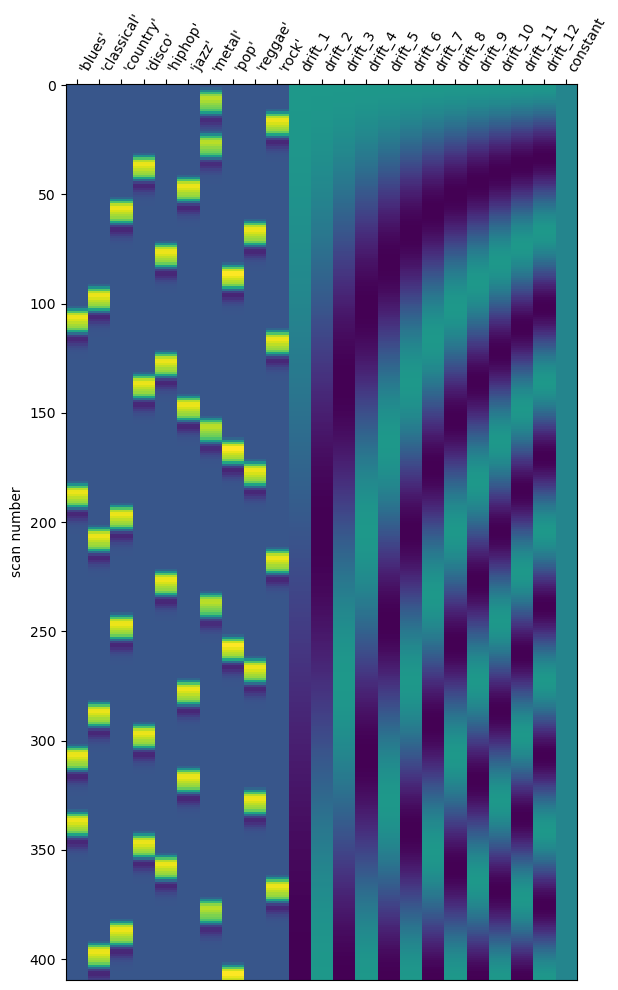

In [16]:
plot_design_matrix(design_matrix)
plt.show()

### Examples of genre contrasts

In [154]:
def make_genre_contrasts(design_matrix, genre_ref):
    """Return a dictionary of contrasts for musical genres, given the design matrix."""
    contrast_matrix = np.eye(design_matrix.shape[1])
    contrasts = {
        column: contrast_matrix[i]
        for i, column in enumerate(design_matrix.columns)
    }

    # Example individual contrasts
    contrasts["ref_vs_metal"] = contrasts[genre_ref] - contrasts["'metal'"]
    contrasts["ref_vs_jazz"] = contrasts[genre_ref] - contrasts["'jazz'"]

    # Group contrasts
    modern_genres = ["'pop'", "'hiphop'", "'metal'", "'disco'"]
    classical_genres = ["'classical'", "'jazz'", "'blues'", "'country'"]
    
    contrasts["modern_vs_classical"] = sum(contrasts[genre] for genre in modern_genres) - sum(contrasts[genre] for genre in classical_genres)
    
    # Contrast combining all genres for a general musical stimulation effect
    all_genres = ["'pop'", "'metal'", "'disco'", "'blues'", "'reggae'", "'rock'", "'hiphop'", "'country'", "'jazz'", "'classical'"]
    all_genres.remove(genre_ref)
    contrasts["all_genres_no_ref"] = sum(contrasts[genre] for genre in all_genres) - contrasts[genre_ref]

    contrasts = {
        "ref - metal": (
            contrasts["ref_vs_metal"]
        ),
        "ref - jazz": contrasts["ref_vs_jazz"],
        "modern genres - classical genres": (
            contrasts["modern_vs_classical"]
        ),
        "all genres - ref": (
            contrasts["all_genres_no_ref"]
        ),
    }
    
    return contrasts


def make_acoustic_contrasts(design_matrix):
    """Return a dictionary of contrasts for musical genres, given the design matrix."""
    contrast_matrix = np.eye(design_matrix.shape[1])
    contrasts = {
        column: contrast_matrix[i]
        for i, column in enumerate(design_matrix.columns)
    }
    spectral_genres = ["'pop'", "'rock'"]      # spectral centroid 
    mfcc_genres = ["'jazz'", "'blues'"]        # mel frequency cepstral coefficients
    tempo_genres = ["'disco'", "'hiphop'"]     # tempo and beat
    hnr_genres = ["'classical'", "'jazz'"]     # harmonic to noise ratio
    other_genres = ["'country'", "'metal'"] 

    contrasts["spectral_other"] = sum(contrasts[genre] for genre in spectral_genres) - sum(contrasts[genre] for genre in other_genres)
    contrasts["hnr_tempo"] = sum(contrasts[genre] for genre in hnr_genres) - sum(contrasts[genre] for genre in tempo_genres)
    contrasts["tempo_mfcc"] = sum(contrasts[genre] for genre in tempo_genres) - sum(contrasts[genre] for genre in mfcc_genres)
    contrasts["mfcc_spectral"] = sum(contrasts[genre] for genre in mfcc_genres) - sum(contrasts[genre] for genre in spectral_genres)

    contrasts = {
        "spectral-other": (
            contrasts["spectral_other"]
        ),
        "hnr-tempo": (
            contrasts["hnr_tempo"]
        ),
        "tempo-mfcc": (
            contrasts["tempo_mfcc"]
        ),
        "mfcc-spectral": (
            contrasts["mfcc_spectral"]
        ),
    }
    
    return contrasts




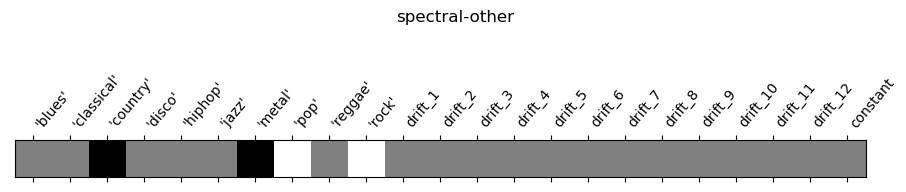

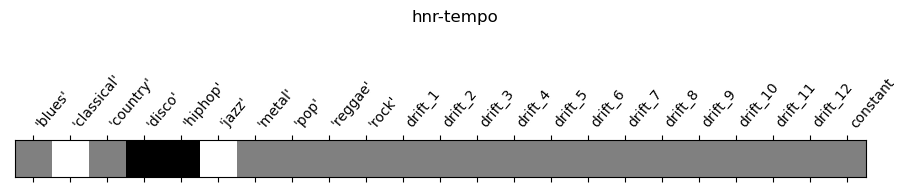

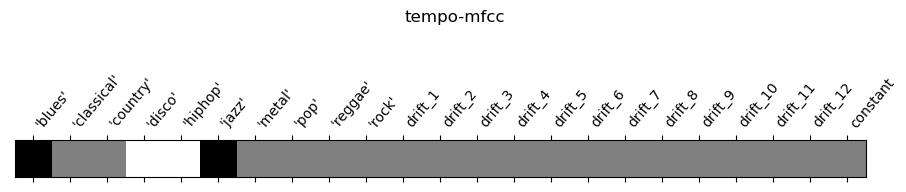

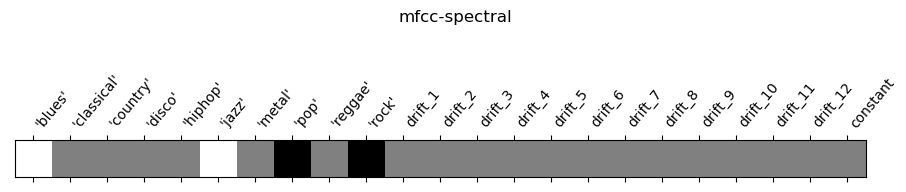

In [155]:
genre_ref_func = "'classical'"
contrasts = make_acoustic_contrasts(design_matrix)  # make_genre_contrasts(design_matrix, genre_ref_func)

for key, values in contrasts.items():
    plot_contrast_matrix(values, design_matrix=design_matrix)
    plt.suptitle(key)

plt.show()

In [156]:
def plot_contrast(first_level_model):
    """Specify, estimate and plot the main contrasts for given a first model."""
    design_matrix = first_level_model.design_matrices_[0]
    contrasts = make_acoustic_contrasts(design_matrix)
    plt.figure(figsize=(20, 4))
    # compute the per-contrast z-map
    for index, (contrast_id, contrast_val) in enumerate(contrasts.items()):
        ax = plt.subplot(1, len(contrasts), 1+index)
        eff_map = first_level_model.compute_contrast(
            contrast_val, output_type="effect_size"
        )
        plotting.plot_stat_map(
            eff_map,
            display_mode="z",
            threshold=3.0,
            vmax=30,
            vmin=-30,
            title=contrast_id,
            axes=ax,
            cut_coords=(1),   
        )

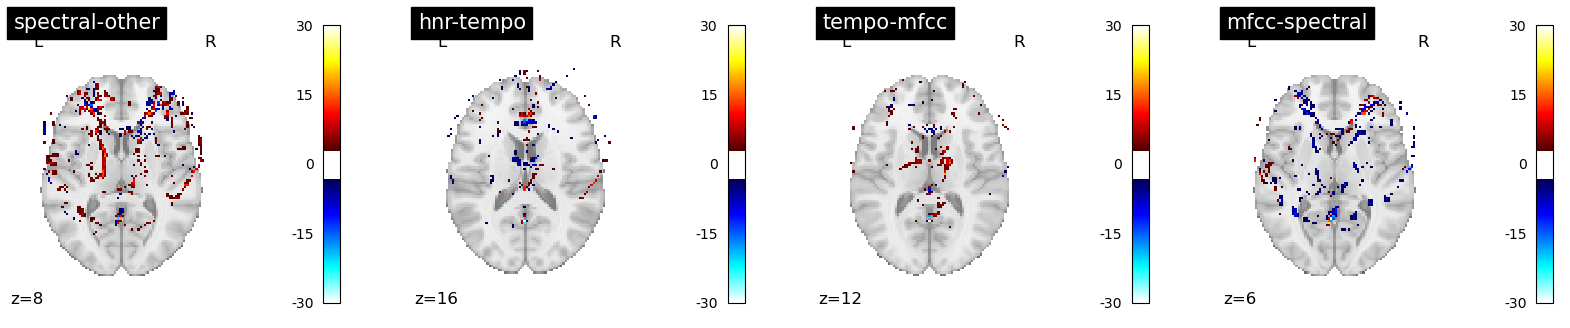

In [157]:
plot_contrast(first_level_model)
plt.show()

### Across genres

(96, 96, 68)


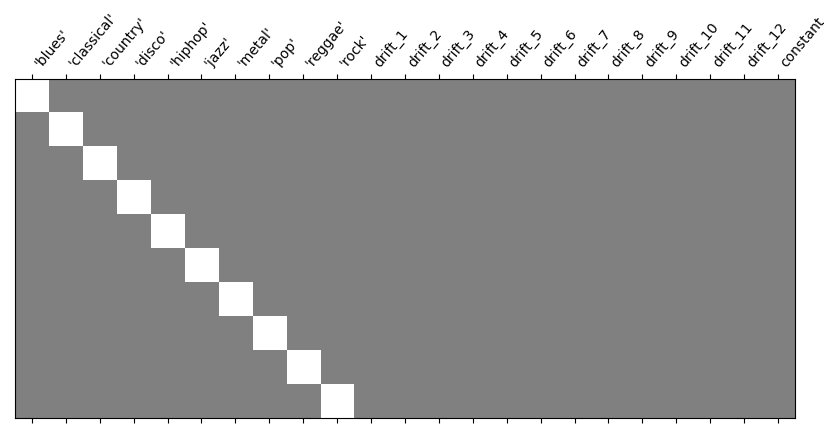

In [ ]:
contrast_val = np.eye(design_matrix.shape[1])[0:-13]
# contrast_val[:,-1] = -1
plot_contrast_matrix(contrast_val, design_matrix)

z_map = first_level_model.compute_contrast(contrast_val, output_type="z_score")
eff_map = first_level_model.compute_contrast(contrast_val, output_type="effect_size")
print(z_map.shape)


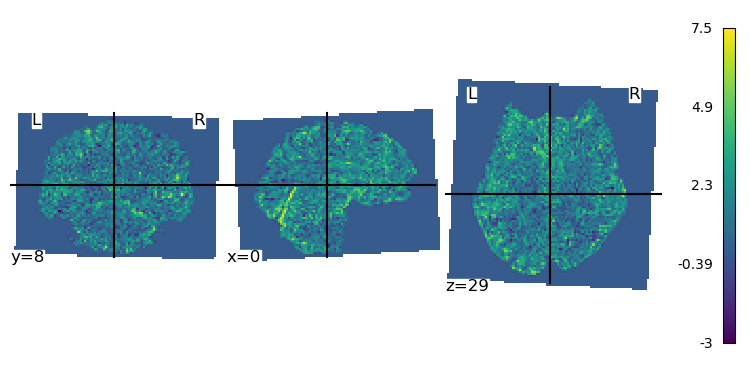

In [ ]:
plotting.plot_img(z_map,colorbar=True,threshold=0)

In [ ]:
imgs=[]
data=eff_map.get_fdata()
print(data.shape)
for i in range(design_matrix.shape[1]-13):
    img_data=data[:,:,:,i]
    img_nii=nib.Nifti1Image(img_data,affine=z_map.affine)
    imgs.append(img_nii)

(96, 96, 68, 10)


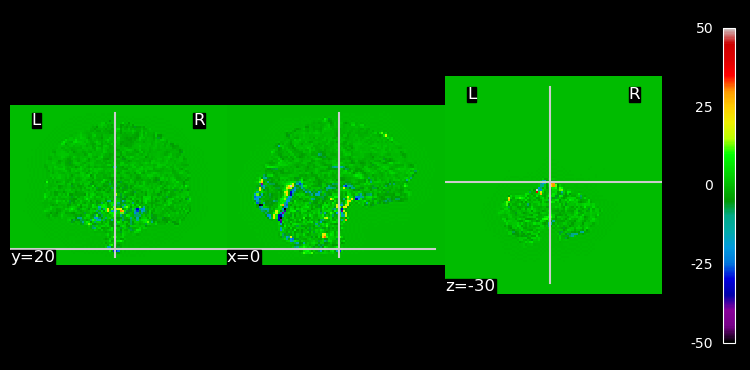

In [ ]:
plotting.plot_epi(imgs[0],vmax=50,vmin=-50,colorbar=True,cut_coords=(0,20,-30))

## 40 Genres + Tracks

In [ ]:
events_df = pd.read_csv(event_path_train, sep='\t')
fmri_img = nib.load(event_path_train.replace('events.tsv', 'bold.nii'))
t_r = 1.5

events_df['trial_type'] = events_df['genre'].str.strip("'") + ' - ' + events_df['track'].astype(str)
first_level_model = FirstLevelModel(t_r)
first_level_model = first_level_model.fit(fmri_img, events=events_df)
design_matrix_gentrack = first_level_model.design_matrices_[0]

/home/matteoc/miniconda3/envs/speech-meg/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:167: UserWarning: The following unexpected columns in events data will be ignored: genre, start, track, end
  warnings.warn(


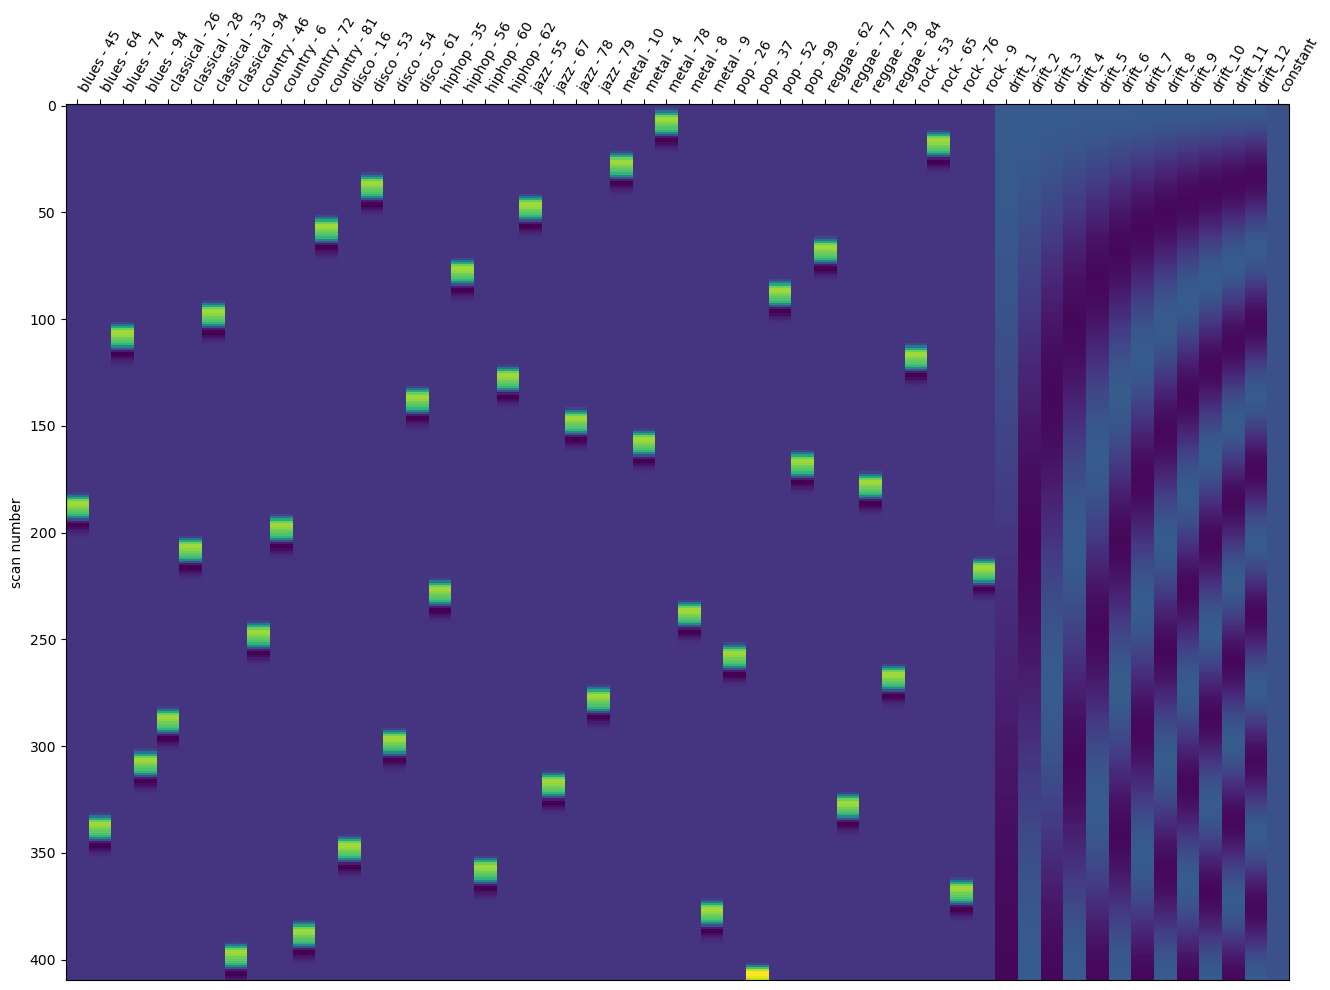

In [ ]:
plot_design_matrix(design_matrix_gentrack)
plt.show()

Z_MAP SHAPE (96, 96, 68)
EFF_MAP SHAPE (96, 96, 68, 41)


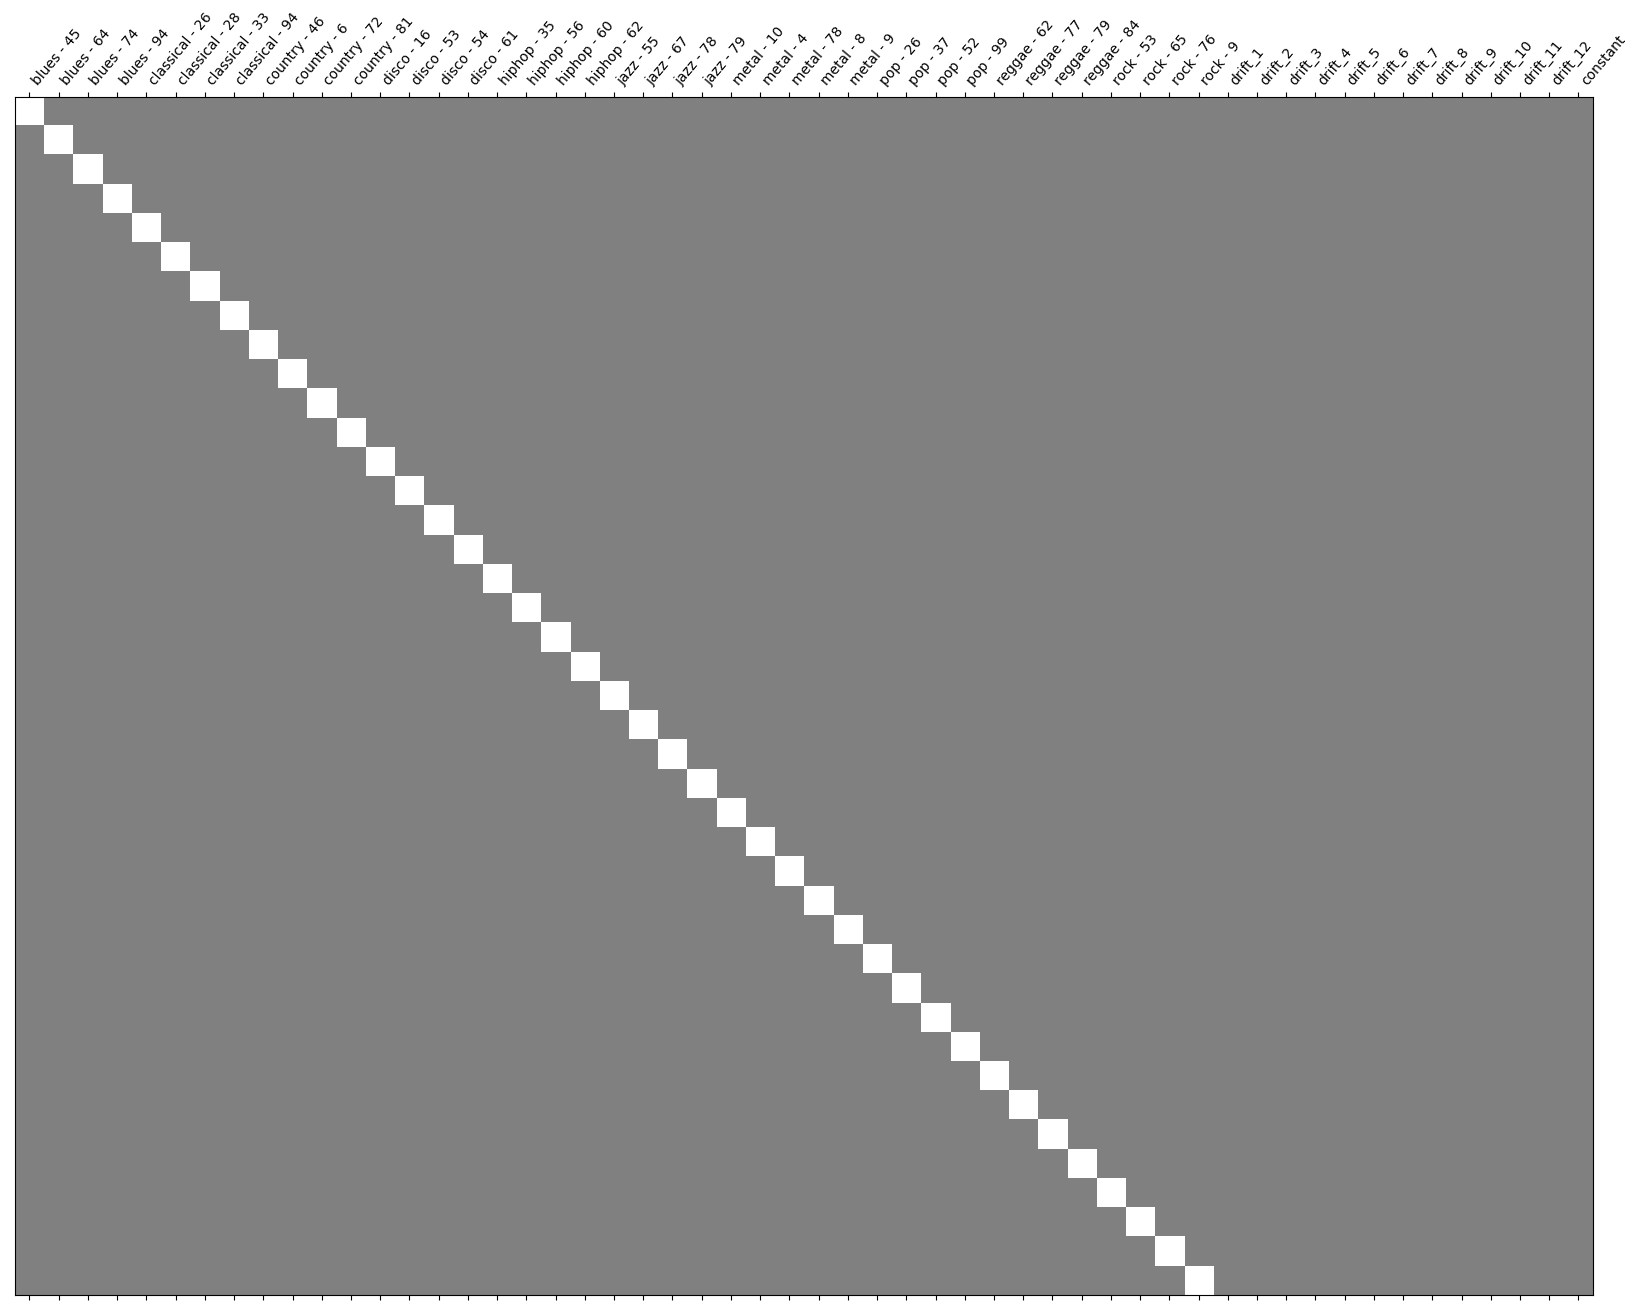

In [ ]:
contrast_val_gentrack = np.eye(design_matrix_gentrack.shape[1])[0:-13]
plot_contrast_matrix(contrast_val_gentrack, design_matrix_gentrack)

z_map_gentrack = first_level_model.compute_contrast(contrast_val_gentrack, output_type="z_score")
eff_map_gentrack = first_level_model.compute_contrast(contrast_val_gentrack, output_type="effect_size")
print('Z_MAP SHAPE', z_map_gentrack.shape)
print('EFF_MAP SHAPE', eff_map_gentrack.shape)

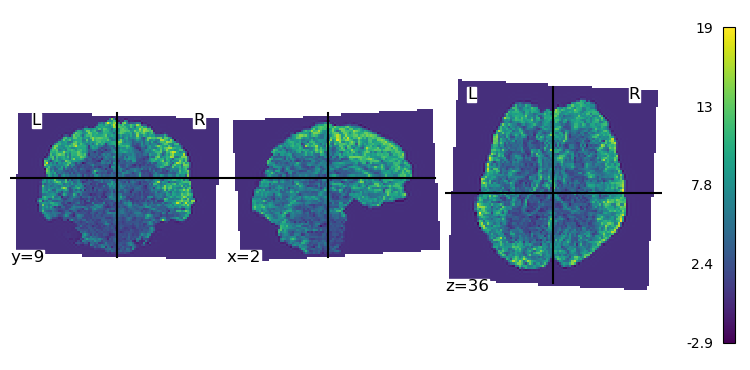

In [ ]:
plotting.plot_img(z_map_gentrack,colorbar=True,threshold=0)

In [ ]:
imgs=[]
data_gentrack=eff_map_gentrack.get_fdata()
for i in range(design_matrix_gentrack.shape[1]-13):
    img_data=data_gentrack[:,:,:,i]
    img_nii=nib.Nifti1Image(img_data,affine=z_map_gentrack.affine)
    imgs.append(img_nii)

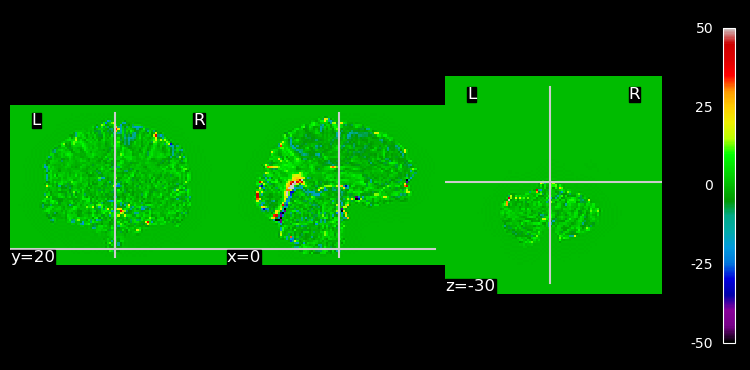

In [ ]:
plotting.plot_epi(imgs[3],vmax=50,vmin=-50,colorbar=True,cut_coords=(0,20,-30))